# Earthquake Type Prediction

* By analyzing given data about earthquakes, we will have to predict if a given earthquake is automated or reviewed.
* (An earthquake is 'reviewed' when automatic earthquake systems fail to record the earthquake.)
  * We will use a Tensorflow ANN to make out predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [197]:
data = pd.read_csv('database.csv')
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [198]:
pd.set_option('display.max_columns', None)
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


# Data Preprocessing

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [200]:
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [201]:
data.isnull().mean()

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809457
Depth Seismic Stations        0.696865
Magnitude                     0.000000
Magnitude Type                0.000128
Magnitude Error               0.986033
Magnitude Seismic Stations    0.890484
Azimuthal Gap                 0.688237
Horizontal Distance           0.931488
Horizontal Error              0.950624
Root Mean Square              0.258842
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
dtype: float64

In [202]:
# Almost 99% values are missing in the 'Magnitude Error' column.

In [203]:
data.loc[:, data.isnull().sum() > 0.66 * data.shape[0]]

,Depth Error,Depth Seismic Stations,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23407,1.2,40.0,0.320,18.0,42.47,0.120,NaN
23408,2.0,33.0,0.260,18.0,48.58,0.129,NaN
23409,1.8,NaN,NaN,NaN,91.00,0.992,4.8
23410,1.8,NaN,NaN,NaN,26.00,3.553,6.0


In [204]:
null_columns = data.loc[:,data.isnull().sum() > 0.66 * data.shape[0]].columns
null_columns

Index(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error'],
      dtype='object')

In [205]:
data = data.drop(null_columns, axis = 1)
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [206]:
data.isnull().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

* Filling the missing values of 'Root Mean Square' column with mean values:

In [207]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [208]:
data.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

* Dropping the rows of dataset containing no values of 'Magnitude Type':

In [209]:
data = data.dropna(axis = 0).reset_index(drop = True)

In [210]:
data.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

# Feature Engineering

In [211]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [212]:
data['Month'] = data['Date'].apply(lambda x : x[0:2])
data['Year'] = data['Date'].apply(lambda x : x[-4:])

In [213]:
data['Hour'] = data['Time'].apply(lambda x : x[0:2])

In [214]:
data.head(1)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,13


In [215]:
data = data.drop('Date', axis = 1)

In [216]:
data = data.drop('Time', axis = 1)

In [217]:
data.head(1)

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,13


In [218]:
data['Month'] = data['Month'].astype(int)

In [220]:
data['Year'] = data['Year'].astype(int)

ValueError: invalid literal for int() with base 10: '000Z'

In [221]:
# There are some values in the 'Year' column that contain 'Z'. We have to remove those rows.

In [222]:
invalid_year_rows = data[data['Year'].str.contains('Z')]
invalid_year_rows

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
3378,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed,19,000Z,19
7510,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed,19,530Z,19
20647,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed,20,520Z,20


In [223]:
invalid_years_indices = data[data['Year'].str.contains('Z')].index

In [224]:
invalid_years_indices

Index([3378, 7510, 20647], dtype='int64')

In [225]:
data = data.drop(invalid_years_indices, axis = 0).reset_index(drop = True)

In [226]:
data['Year'] = data['Year'].astype(int)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23406 entries, 0 to 23405
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23406 non-null  float64
 1   Longitude         23406 non-null  float64
 2   Type              23406 non-null  object 
 3   Depth             23406 non-null  float64
 4   Magnitude         23406 non-null  float64
 5   Magnitude Type    23406 non-null  object 
 6   Root Mean Square  23406 non-null  float64
 7   ID                23406 non-null  object 
 8   Source            23406 non-null  object 
 9   Location Source   23406 non-null  object 
 10  Magnitude Source  23406 non-null  object 
 11  Status            23406 non-null  object 
 12  Month             23406 non-null  int64  
 13  Year              23406 non-null  int64  
 14  Hour              23406 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 2.7+ MB


In [228]:
data['Hour'] = data['Hour'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23406 entries, 0 to 23405
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23406 non-null  float64
 1   Longitude         23406 non-null  float64
 2   Type              23406 non-null  object 
 3   Depth             23406 non-null  float64
 4   Magnitude         23406 non-null  float64
 5   Magnitude Type    23406 non-null  object 
 6   Root Mean Square  23406 non-null  float64
 7   ID                23406 non-null  object 
 8   Source            23406 non-null  object 
 9   Location Source   23406 non-null  object 
 10  Magnitude Source  23406 non-null  object 
 11  Status            23406 non-null  object 
 12  Month             23406 non-null  int64  
 13  Year              23406 non-null  int64  
 14  Hour              23406 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 2.7+ MB


In [229]:
data.head(1)

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13


* Converting Status values into binary values:

In [230]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [231]:
data['Status'] = data['Status'].apply(lambda x : 1 if x == 'Reviewed' else 0)

In [232]:
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,1,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,1,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,1,12,2016,22


In [233]:
# We will drop the 'ID' column. It will not give us valuable information regarding prediction.

In [234]:
data = data.drop('ID', axis = 1)
data.head(1)

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13


# Data Visualization

* Heatmap

In [235]:
corr = data.corr(numeric_only = True)

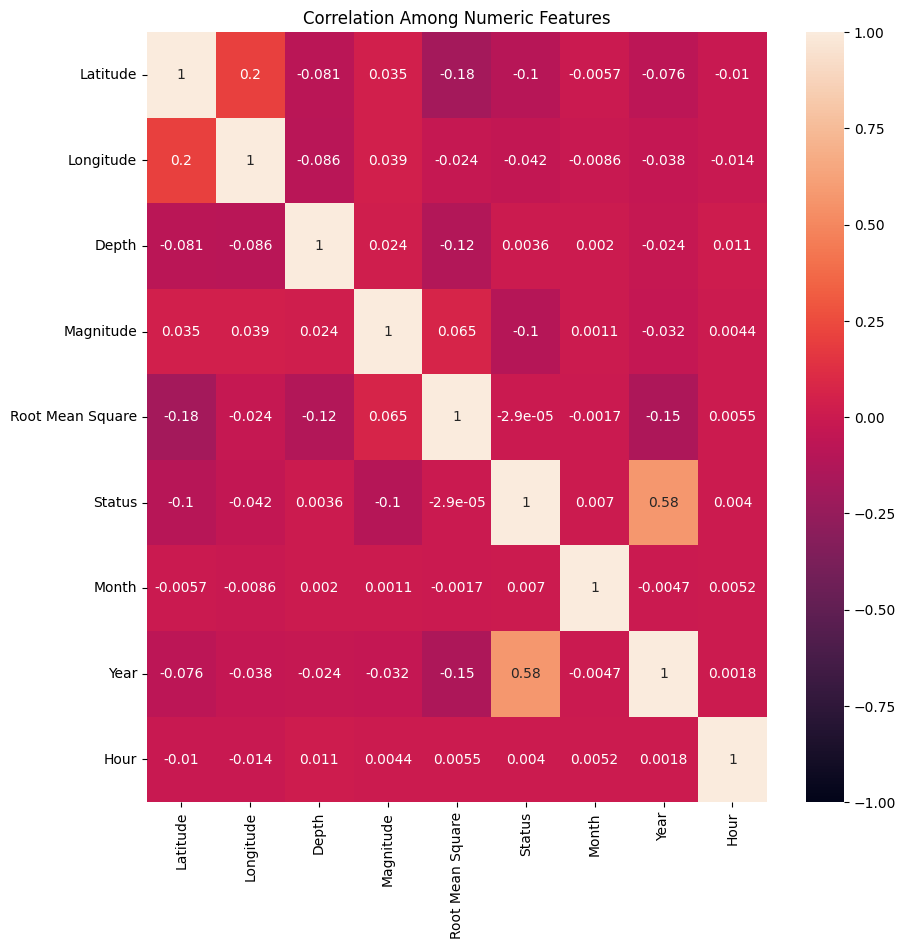

In [236]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True, vmin = -1.0, vmax = 1.0)
plt.title("Correlation Among Numeric Features")
plt.show()

* Another Way (More Appropriate):

In [237]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']

In [238]:
corr_1 = data[numeric_columns].corr()

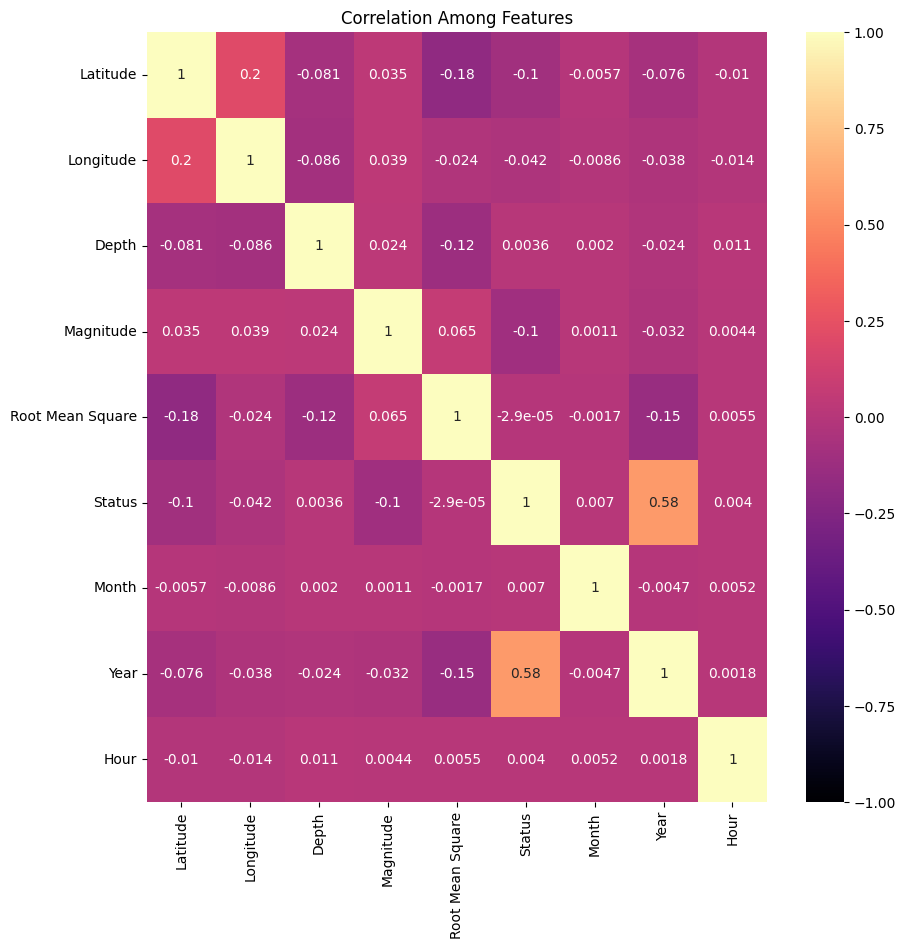

In [239]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_1, annot = True, vmin = -1.0, vmax = 1.0, cmap = 'magma')
plt.title("Correlation Among Features")
plt.show()

In [240]:
# We can see that as the year goes up, the number of 'reviewed' cases increases. That's an interesting thing to have a look at.

In [241]:
# The second method is more feasible, because it lets us to remove any feature afterwards if we don't want it in our numeric_columns.

* KDE plot

In [242]:
numeric_columns.remove('Status')

In [243]:
# It isn't removing 'Status' from the DataFrame, just from the above list.

In [244]:
# The full form of KDE plot is Kernel Distribution Estimation plot.

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


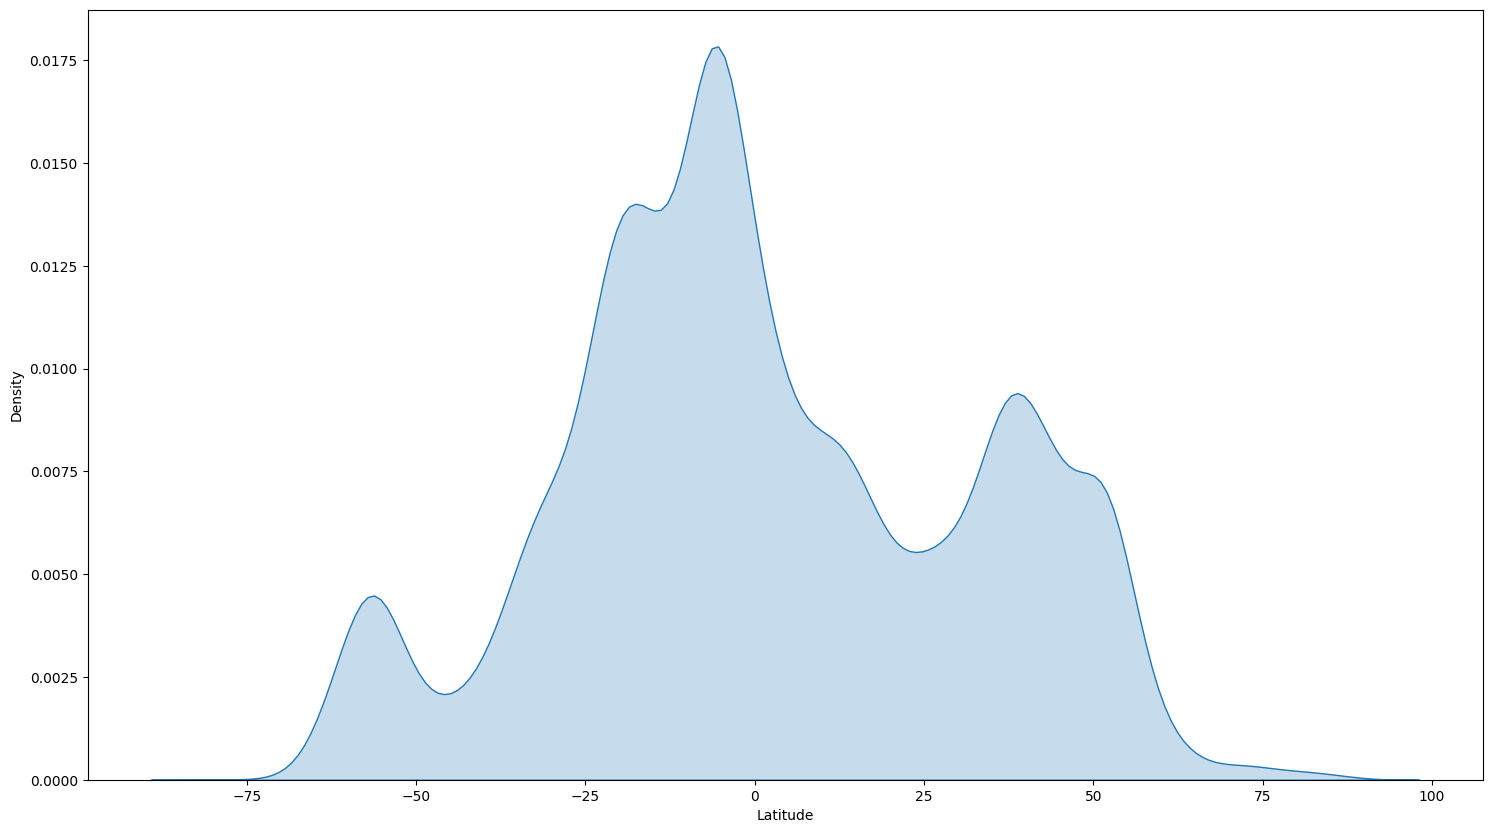

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


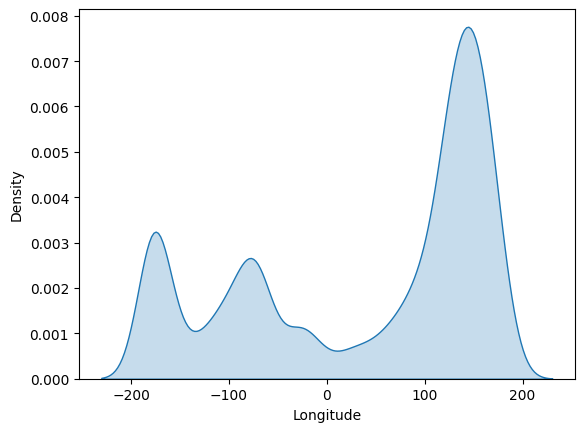

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


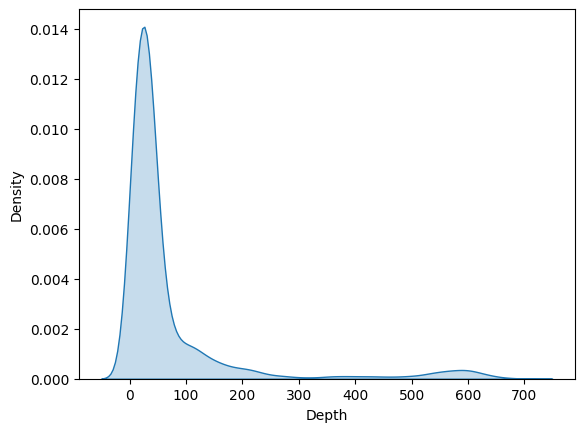

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


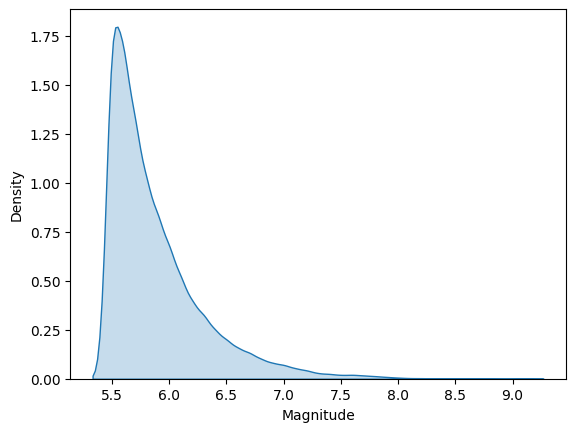

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


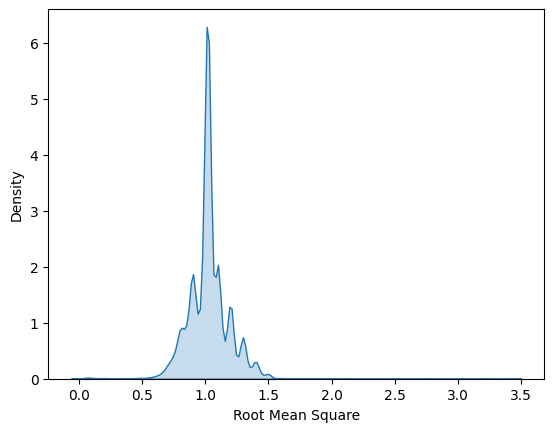

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


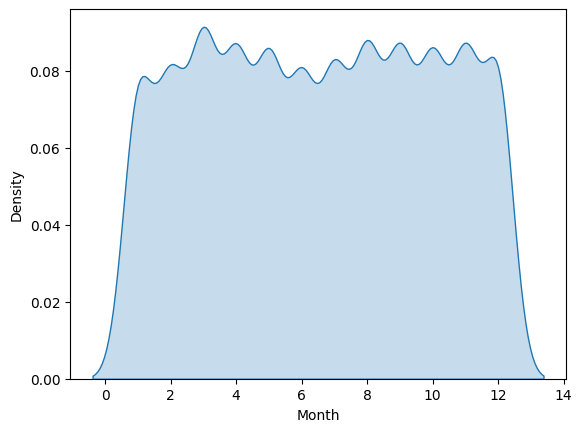

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


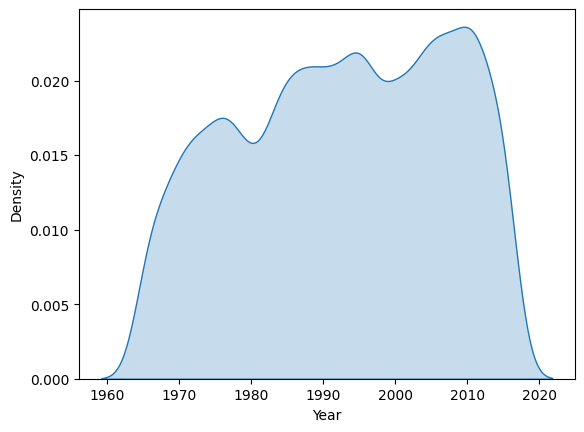

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3491814612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade = True, label = column)


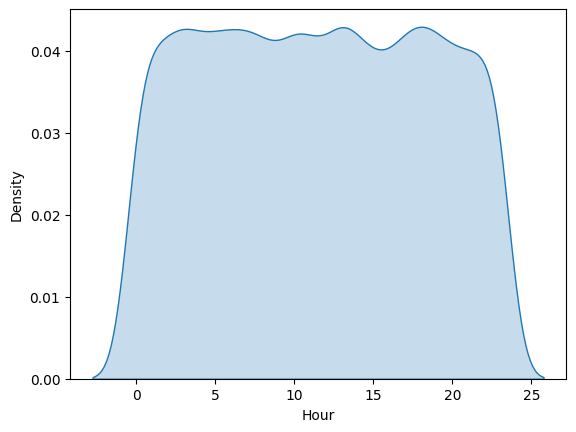

In [245]:
plt.figure(figsize = (18,10))
for column in numeric_columns:
    sns.kdeplot(data[column], shade = True, label = column)
    plt.show()

In [246]:
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns = numeric_columns)

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3212556596.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_data[column], shade = True, label = column)
C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3212556596.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_data[column], shade = True, label = column)
C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3212556596.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_data[column], shade = True, label = column)
C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3212556596.py:3: FutureWarning: 

`shade` is now deprecated in favor

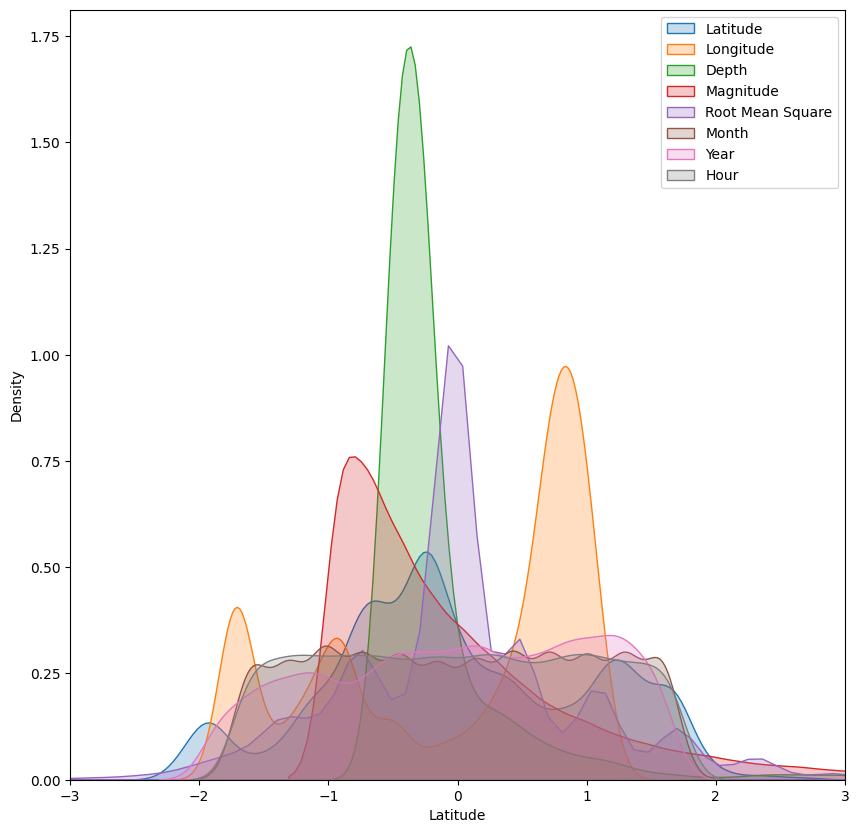

In [247]:
plt.figure(figsize = (10,10))
for column in numeric_columns:
    sns.kdeplot(standardized_data[column], shade = True, label = column)
plt.legend()
plt.xlim(-3,3)
plt.show()

* For publication ready use:

C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3262126211.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3262126211.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3262126211.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\tanvi\AppData\Local\Temp\ipykernel_16892\3262126211.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\tanvi\AppData\Local\Temp\ipykernel_1689

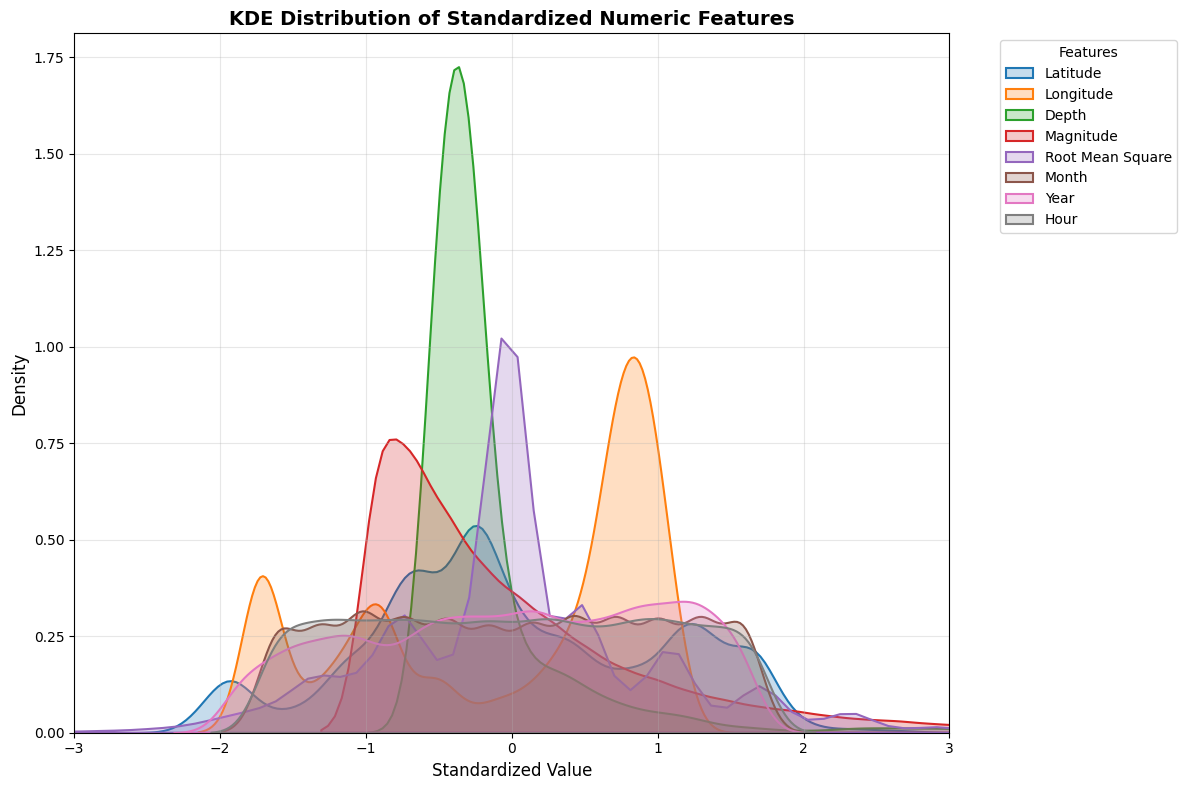

In [248]:
plt.figure(figsize=(12, 8))

# Custom color palette for distinct curves
palette = sns.color_palette("tab10", n_colors=len(numeric_columns))

for i, column in enumerate(numeric_columns):
    sns.kdeplot(
        standardized_data[column],
        shade=True,               # keep lines crisp
        linewidth=1.5,               # thicker lines
        color=palette[i],          # distinct color for each curve
        label=column
    )

# Legend outside the plot
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Titles and labels
plt.title("KDE Distribution of Standardized Numeric Features", fontsize=14, weight="bold")
plt.xlabel("Standardized Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

# X-axis range
plt.xlim(-3, 3)

# Grid for clarity
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Encoding

In [249]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [250]:
# If we want to transform 'object' values of one column that has several types of values, we will have to use onehot_encoding which will create dummies.

In [251]:
pd.get_dummies(data['Type'], prefix = 'TYPE', drop_first = False, dtype = int) 

# This is the correct way to get dummies of a column.

,TYPE_Earthquake,TYPE_Explosion,TYPE_Nuclear Explosion,TYPE_Rock Burst
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
23401,1,0,0,0
23402,1,0,0,0
23403,1,0,0,0
23404,1,0,0,0


In [252]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix = prefix, drop_first = False, dtype = int)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis = 1)
    return df

In [253]:
data.head(1)

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13


In [254]:
data = onehot_encode(
    data,
    ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
    ['t', 'mt', 's', 'ls', 'ms']
)

In [255]:
data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,t_Earthquake,t_Explosion,t_Nuclear Explosion,t_Rock Burst,mt_MB,mt_MD,mt_MH,mt_ML,mt_MS,mt_MW,mt_MWB,mt_MWC,mt_MWR,mt_MWW,s_AK,s_CI,s_GCMT,s_ISCGEM,s_ISCGEMSUP,s_NC,s_NN,s_OFFICIAL,s_PR,s_SE,s_US,s_UW,ls_AEI,ls_AEIC,ls_AG,ls_AGS,ls_AK,ls_ATH,ls_B,ls_BEO,ls_BOU,ls_BRK,ls_CAR,ls_CASC,ls_CI,ls_CSEM,ls_G,ls_GCMT,ls_GUC,ls_H,ls_HVO,ls_ISCGEM,ls_ISK,ls_JMA,ls_LIM,ls_MDD,ls_NC,ls_NN,ls_OTT,ls_PGC,ls_PR,ls_ROM,ls_RSPR,ls_SE,ls_SJA,ls_SLC,ls_SPE,ls_TAP,ls_TEH,ls_THE,ls_THR,ls_TUL,ls_U,ls_UCR,ls_UNM,ls_US,ls_US_WEL,ls_UW,ls_WEL,ms_1000,ms_1009,ms_1020,ms_1023,ms_AK,ms_BRK,ms_CI,ms_GCMT,ms_GUC,ms_HRV,ms_ISCGEM,ms_NC,ms_NIED,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,12.30,5.6,0.189800,1,12,2016,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23402,38.3777,-118.8957,8.80,5.5,0.218700,1,12,2016,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23403,36.9179,140.4262,10.00,5.9,1.520000,1,12,2016,12,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
23404,-9.0283,118.6639,79.00,6.3,1.430000,1,12,2016,22,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Splitting and Scaling

In [256]:
y = data['Status'].copy()
X = data.drop('Status', axis = 1)

In [257]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 56)

# Modeling and Training

In [259]:
X.shape

(23406, 104)

In [260]:
y.mean()

np.float64(0.88737930445185)

In [261]:
# Almost 89% of y data is positively labeled, and other 11% data is negatively labeled.

In [263]:
inputs = tf.keras.Input(shape = (104,))
x = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [tf.keras.metrics.AUC(name = 'auc')]
)

batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()],
    verbose = 0
)

# Results

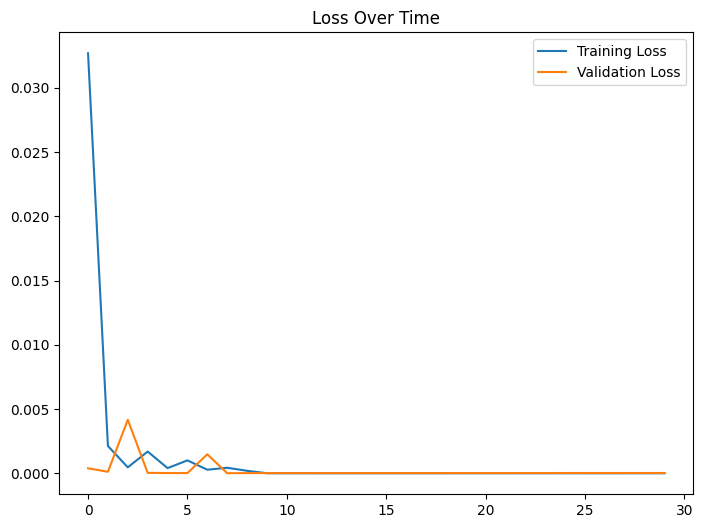

In [269]:
plt.figure(figsize = (18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend()
plt.title("Loss Over Time")
plt.show()

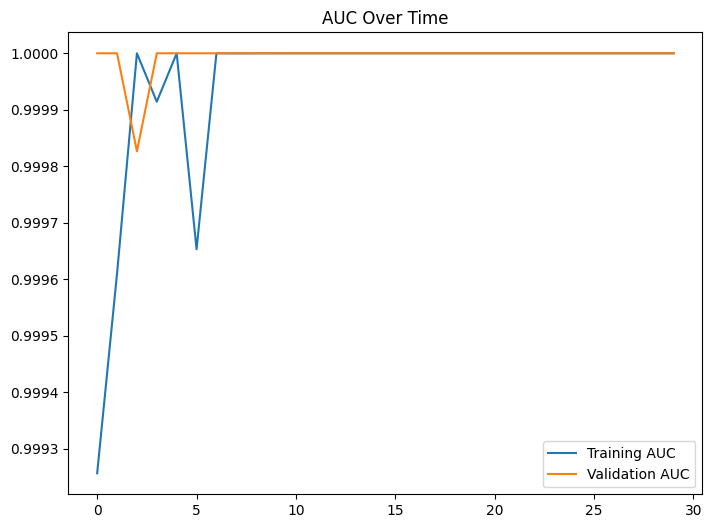

In [270]:
plt.figure(figsize = (18, 6))

epochs_range = range(epochs)
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_auc, label = "Training AUC")
plt.plot(epochs_range, val_auc, label = "Validation AUC")
plt.legend()
plt.title("AUC Over Time")
plt.show()

In [271]:
model.evaluate(X_test, y_test)

220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 1.0000 - loss: 5.2467e-05


[5.2467377827269956e-05, 1.0]

In [272]:
len(y_test)

7022